# Лабораторная работа №9, 10
## Выполнил: Пелагеев Даниил Иванович Б9122-01.03.02мкт

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture

## Загрузка и подготовка данных

In [2]:
df = pd.read_csv('datasets/StudentsPerformance.csv',  sep=",")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df = pd.get_dummies(df, drop_first=True)

df.isnull().sum()

math score                                       0
reading score                                    0
writing score                                    0
gender_male                                      0
race/ethnicity_group B                           0
race/ethnicity_group C                           0
race/ethnicity_group D                           0
race/ethnicity_group E                           0
parental level of education_bachelor's degree    0
parental level of education_high school          0
parental level of education_master's degree      0
parental level of education_some college         0
parental level of education_some high school     0
lunch_standard                                   0
test preparation course_none                     0
dtype: int64

In [4]:
data_encoded = pd.get_dummies(df, drop_first=True)

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

## Метод главных компонент (PCA)

Объясненная дисперсия для каждого компонента: [0.20489504 0.09711489 0.09010931 0.0862604  0.08216502 0.08035288
 0.07619784 0.07251149 0.0654515  0.0650896  0.04687268 0.01782921
 0.00777285 0.00515627 0.00222101]


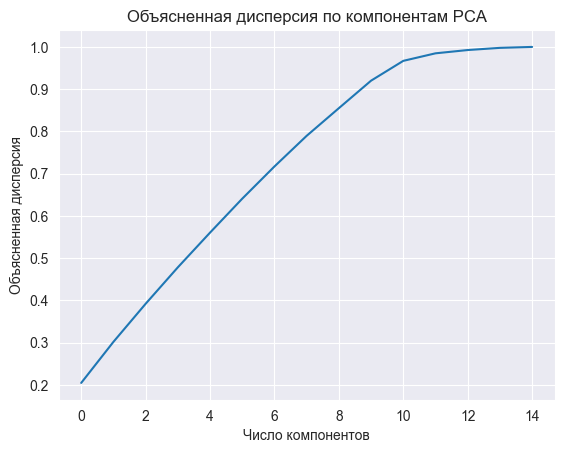

Число выбранных компонент: 11


In [6]:
pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия для каждого компонента: {explained_variance}")

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Число компонентов')
plt.ylabel('Объясненная дисперсия')
plt.title('Объясненная дисперсия по компонентам PCA')
plt.show()

n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Число выбранных компонент: {n_components}")

Метод главных компонент (PCA) помогает выявить линейные комбинации признаков, которые объясняют наибольшую дисперсию в данных.
Основные моменты:
- Объясненная дисперсия: важно оценить, сколько дисперсии объясняется каждым компонентом. Если первые несколько компонентов объясняют значительную часть дисперсии, это указывает на возможность сокращения размерности данных без значительных потерь информации.
- Выбор числа компонентов: на основе объясненной дисперсии можно выбрать количество компонент, которые будут использоваться для дальнейшего анализа (например, выбрав компоненты, которые объясняют не менее 95% дисперсии).

## Метод главных факторов (Factor Analysis)

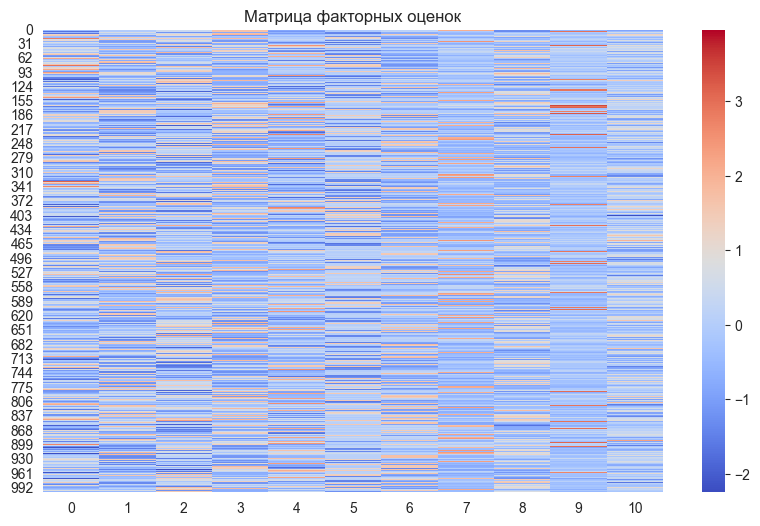

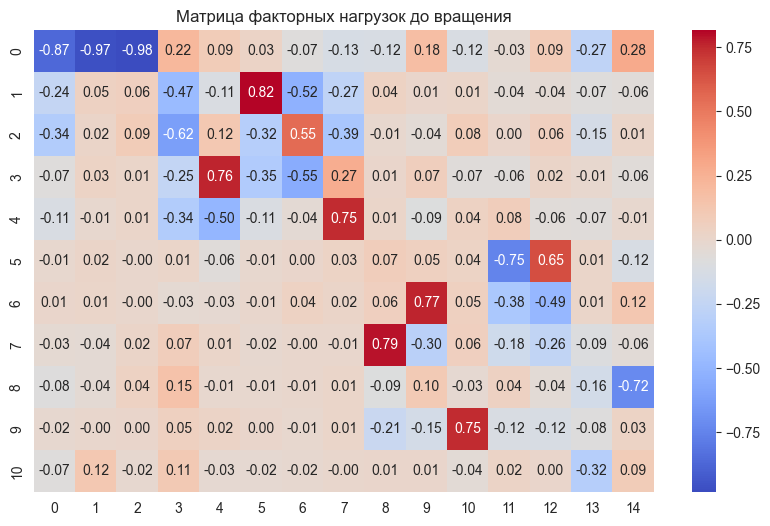

In [7]:
fa = FactorAnalysis(n_components=n_components)
factors = fa.fit_transform(scaled_data)


plt.figure(figsize=(10, 6))
sns.heatmap(factors, cmap='coolwarm', annot=False)
plt.title("Матрица факторных оценок")
plt.show()


loadings = fa.components_
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Матрица факторных нагрузок до вращения")
plt.show()

Факторный анализ направлен на выявление латентных факторов, которые лежат в основе наблюдаемых переменных. Этот метод полезен, когда необходимо найти скрытые связи между признаками. Он помогает:

- Интерпретировать латентные факторы, которые могут быть не очевидны из исходных данных.
- Уменьшить размерность, выделяя несколько факторов, которые объясняют большую часть вариативности в данных.

Здесь мы изобразили два графика, чтобы позже увидеть как работает вращение факторов. В общем случае факторные оценки просто могут меняться иначе или не меняться так заметно, поскольку вращение оптимизирует структуру нагрузок, а вот координаты точек(факторные оценки) в факторном пространстве не меняются.

## Метод максимального правдоподобия

In [8]:
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(scaled_data)

print(f"Средние значения: {gmm.means_}")
print(f"Ковариационные матрицы: {gmm.covariances_}")

Средние значения: [[-7.08347675e-02  2.86871802e-02  2.76682393e-02 -1.59979989e-01
  -4.84322105e-01  1.46109419e+00 -5.95830135e-01 -4.03473292e-01
  -3.65768845e-01 -4.93741931e-01 -2.50398195e-01  3.10038164e-01
   1.65038890e-01  5.24605932e-02 -2.73960952e-02]
 [-9.94177972e-01 -7.35578587e-01 -8.45177792e-01 -1.38002501e-01
   4.02308751e-01  3.88337808e-01 -5.95830135e-01 -4.03473292e-01
  -3.65768845e-01  2.02534955e+00 -2.50398195e-01 -5.40360680e-01
  -4.66933396e-01 -1.34792485e+00  6.65670317e-02]
 [ 6.27672242e-02  4.26883440e-02  9.58692140e-02  5.61706386e-02
  -4.84322105e-01 -6.84418572e-01  1.18992031e+00 -4.03473292e-01
  -3.65768845e-01 -4.93741931e-01 -2.50398195e-01  8.23619179e-01
  -4.66933396e-01 -1.13677030e-01  6.07847344e-02]
 [ 2.11870325e-01  2.59098780e-01  2.36764975e-01 -6.40415124e-02
   2.06474160e+00 -6.84418572e-01 -5.95830135e-01 -4.03473292e-01
   2.73396713e+00 -4.93741931e-01 -2.50398195e-01 -5.40360680e-01
  -4.66933396e-01 -1.98531567e-01  4.

Метод максимального правдоподобия используется для оценки параметров модели, минимизируя ошибку между предсказанными и реальными значениями. В случае использования для оценки параметров, таких как средние значения и ковариации в модели, это помогает:

- Оценить параметры распределений (например, для использования в моделях, таких как Гауссовые смеси).
- Обеспечить более точные и надежные выводы о скрытых зависимостях в данных.

##  Выбор числа факторов

In [9]:
eigenvalues = pca.explained_variance_
eigenvalue_criteria = sum(eigenvalues > 1)
print(f"Число факторов по методу Кайзера: {eigenvalue_criteria}")

Число факторов по методу Кайзера: 8


Выбор числа факторов — это важный этап, который позволяет уменьшить размерность данных, оставив только те факторы, которые имеют значимое влияние. Методы, такие как:

Критерий Кайзера (выбор факторов с собственными значениями больше 1) или
График объясненной дисперсии (PCA),
помогают принять решение о числе факторов, которые наиболее эффективно объясняют вариацию в данных, исключая избыточную информацию.

## Вращение факторов и интерпретация

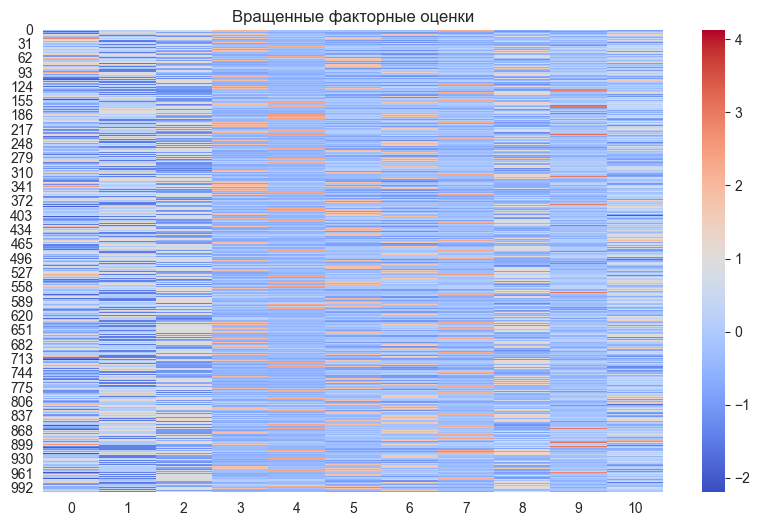

In [10]:
fa_rotated = FactorAnalysis(n_components=n_components, rotation='varimax')
factors_rotated = fa_rotated.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.heatmap(factors_rotated, cmap='coolwarm', annot=False)
plt.title("Вращенные факторные оценки")
plt.show()

Вращение факторов (например, метод Варимакса) позволяет сделать факторы более интерпретируемыми, улучшая их независимость и повышая удобство интерпретации. Например, после вращения мы можем лучше понять, что каждый фактор представляет собой:

- Один фактор может быть связан с подготовкой и временем, потраченным на учебу, а другой — с социальным статусом или внешними факторами.

Вращение помогает выделить более чистые факторы и облегчить их интерпретацию, что делает модель более понятной.

## Визуализация факторных нагрузок

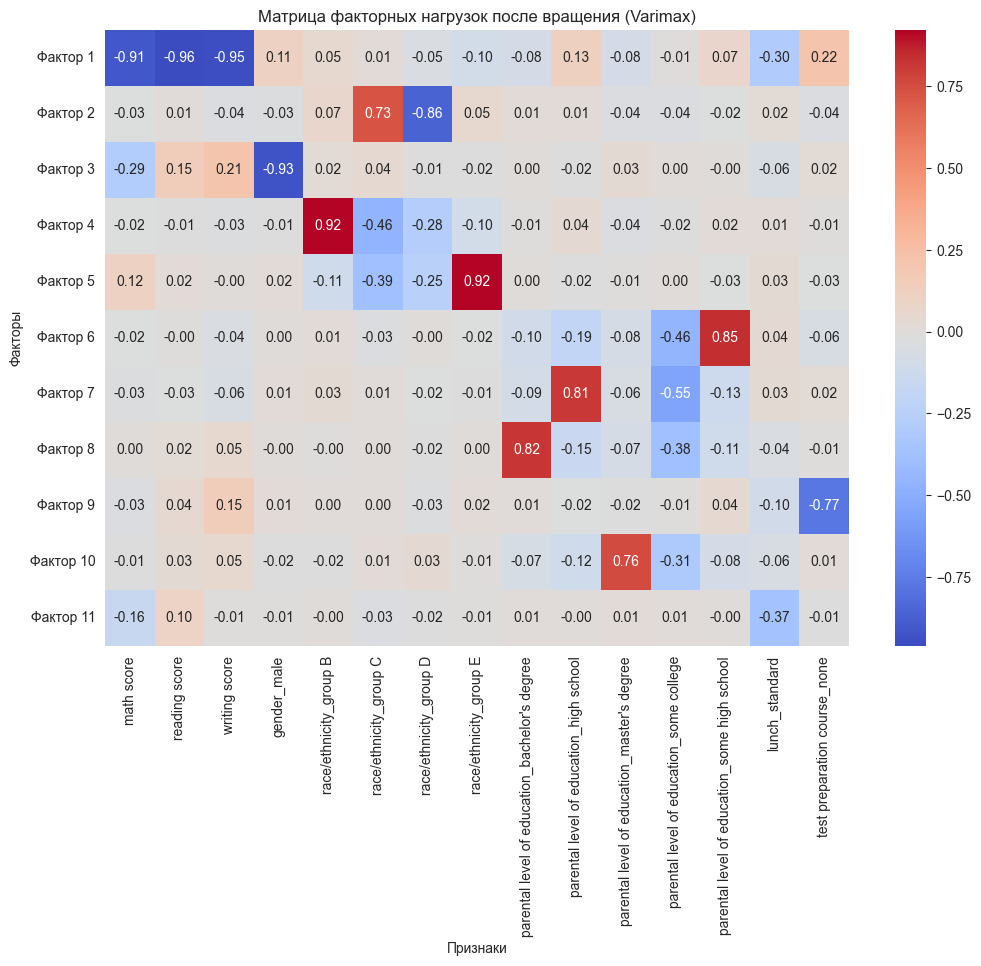

In [11]:
factor_loadings = fa_rotated.components_

# Визуализация матрицы факторных нагрузок
plt.figure(figsize=(12, 8))
sns.heatmap(factor_loadings, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns, yticklabels=[f'Фактор {i+1}' for i in range(factor_loadings.shape[0])])
plt.title('Матрица факторных нагрузок после вращения (Varimax)')
plt.xlabel('Признаки')
plt.ylabel('Факторы')
plt.show()

Как мы видим после вращения факторов мы получим матрицу, которую куда легче интерпретировать.

## Визуализация распределения факторов (scatter plot)

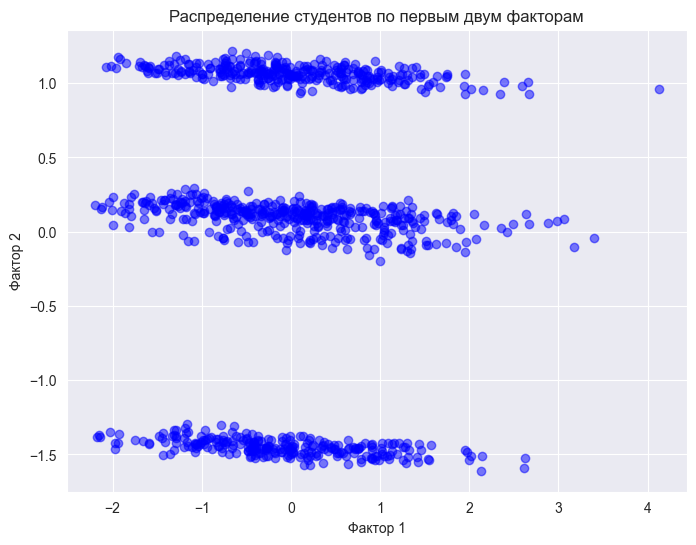

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(factors_rotated[:, 0], factors_rotated[:, 1], c='blue', alpha=0.5)
plt.title("Распределение студентов по первым двум факторам")
plt.xlabel("Фактор 1")
plt.ylabel("Фактор 2")
plt.grid(True)
plt.show()

Распределение по двум факторам позволяет понять, что существуют групп студентов с особыми характеристиками, так как наблюдения группируются в отдельные кластеры.